# Analyzing PBMCs of Covid patients and healthy controls

## Load libraries

In [92]:
import scanpy as sc
import os

import numpy as np
import pandas as pd

import seaborn as sb
import matplotlib.pyplot as plt

# Load the data

Make sure we are in the correct working directory

In [93]:
os.getcwd() #get current working directory

'C:\\Users\\Nastavnik\\S3_project\\DDD_disk'

In [94]:
# change working directory
os.chdir('C:\\Users\\Nastavnik\\S3_project\\DDD_disk')

In [95]:
# Load count matrices for all samples (cells by genes)
adata_cov1 = sc.read_10x_h5("data/nCoV_PBMC_1.h5")
adata_cov2 = sc.read_10x_h5("data/nCoV_PBMC_15.h5")
adata_cov3 = sc.read_10x_h5("data/nCoV_PBMC_17.h5")
adata_norm1 = sc.read_10x_h5("data/Normal_PBMC_13.h5")
adata_norm2 = sc.read_10x_h5("data/Normal_PBMC_14.h5")
adata_norm3 = sc.read_10x_h5("data/Normal_PBMC_5.h5")

C:\Users\Nastavnik\miniconda3\envs\sc_analysis\lib\site-packages\scanpy\readwrite.py:281: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = AnnData(
C:\Users\Nastavnik\miniconda3\envs\sc_analysis\lib\site-packages\anndata\_core\anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
C:\Users\Nastavnik\miniconda3\envs\sc_analysis\lib\site-packages\scanpy\readwrite.py:281: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = AnnData(
C:\Users\Nastavnik\miniconda3\envs\sc_analysis\lib\site

In [96]:
pd.Series(list(adata_cov1.var['gene_ids'])).value_counts()

ENSG00000243485    1
ENSG00000080166    1
ENSG00000224394    1
ENSG00000183098    1
ENSG00000278177    1
                  ..
ENSG00000135336    1
ENSG00000146282    1
ENSG00000164414    1
ENSG00000213204    1
ENSG00000268674    1
Length: 33538, dtype: int64

In [97]:
adata_cov1.var.loc['PDE11A']

,gene_ids,feature_types,genome
PDE11A,ENSG00000128655,Gene Expression,GRCh38
PDE11A,ENSG00000284741,Gene Expression,GRCh38


In [98]:
# Make variable names (gene names) unique
adata_cov1.var_names_make_unique()
adata_cov2.var_names_make_unique()
adata_cov3.var_names_make_unique()
adata_norm1.var_names_make_unique()
adata_norm2.var_names_make_unique()
adata_norm3.var_names_make_unique()

In [99]:
adata_cov1.var.loc[adata_cov1.var_names.str.startswith('PDE11A'),:]

,gene_ids,feature_types,genome
PDE11A,ENSG00000128655,Gene Expression,GRCh38
PDE11A-1,ENSG00000284741,Gene Expression,GRCh38


In [100]:
adata_cov1.obs["sample"] = "cov1"
adata_cov2.obs["sample"] = "cov2"
adata_cov3.obs["sample"] = "cov3"
adata_norm1.obs["sample"] = "norm1"
adata_norm2.obs["sample"] = "norm2"
adata_norm3.obs["sample"] = "norm3"

In [101]:
adata_cov1.obs["condition"] = "covid"
adata_cov2.obs["condition"] = "covid"
adata_cov3.obs["condition"] = "covid"
adata_norm1.obs["condition"] = "control"
adata_norm2.obs["condition"] = "control"
adata_norm3.obs["condition"] = "control"

Concatenate all objects (combine adata objects into one)

In [102]:
adata = adata_cov1.concatenate(adata_cov2, adata_cov3,
                      adata_norm1, adata_norm2,
                      adata_norm3)

C:\Users\Nastavnik\miniconda3\envs\sc_analysis\lib\site-packages\anndata\_core\anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],


In [103]:
adata

AnnData object with n_obs × n_vars = 9000 × 33538
    obs: 'sample', 'condition', 'batch'
    var: 'gene_ids', 'feature_types', 'genome'

In [104]:
adata.obs

,sample,condition,batch
AGGGTCCCATGACCCG-1-0,cov1,covid,0
TACCCACAGCGGGTTA-1-0,cov1,covid,0
CCCAACTTCATATGGC-1-0,cov1,covid,0
TCAAGTGTCCGAACGC-1-0,cov1,covid,0
ATTCCTAGTGACTGTT-1-0,cov1,covid,0
...,...,...,...
GTCACTCCACTCTCGT-5-5,norm3,control,5
TGACCCTGTAGATTAG-5-5,norm3,control,5
TCCTTTCGTAAGGCCA-5-5,norm3,control,5
CTACCCACACGACCTG-5-5,norm3,control,5


In [105]:
adata.X

<9000x33538 sparse matrix of type '<class 'numpy.float32'>'
	with 12963069 stored elements in Compressed Sparse Row format>

In [106]:
adata.X = adata.X.toarray()

In [107]:
adata.X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## Data QC

In [108]:
adata

AnnData object with n_obs × n_vars = 9000 × 33538
    obs: 'sample', 'condition', 'batch'
    var: 'gene_ids', 'feature_types', 'genome'

In [109]:
# Quality control - calculate QC covariates
adata.obs['n_counts'] = adata.X.sum(1)
adata.obs['log_counts'] = np.log(adata.obs['n_counts'])
adata.obs['n_genes'] = (adata.X > 0).sum(1)

In [110]:
mt_gene_mask = [gene.startswith('MT-') for gene in adata.var_names]

In [111]:
adata.obs['mt_frac'] = adata.X[:, mt_gene_mask].sum(1)/adata.obs['n_counts']

In [112]:
adata

AnnData object with n_obs × n_vars = 9000 × 33538
    obs: 'sample', 'condition', 'batch', 'n_counts', 'log_counts', 'n_genes', 'mt_frac'
    var: 'gene_ids', 'feature_types', 'genome'

In [113]:
adata.obs

,sample,condition,batch,n_counts,log_counts,n_genes,mt_frac
AGGGTCCCATGACCCG-1-0,cov1,covid,0,7698.0,8.948716,2140,0.068200
TACCCACAGCGGGTTA-1-0,cov1,covid,0,13416.0,9.504204,3391,0.070960
CCCAACTTCATATGGC-1-0,cov1,covid,0,16498.0,9.710995,3654,0.075949
TCAAGTGTCCGAACGC-1-0,cov1,covid,0,1425.0,7.261927,608,0.098947
ATTCCTAGTGACTGTT-1-0,cov1,covid,0,7535.0,8.927314,1808,0.062376
...,...,...,...,...,...,...,...
GTCACTCCACTCTCGT-5-5,norm3,control,5,6479.0,8.776321,1941,0.080259
TGACCCTGTAGATTAG-5-5,norm3,control,5,5335.0,8.582045,1867,0.091471
TCCTTTCGTAAGGCCA-5-5,norm3,control,5,4596.0,8.432941,1486,0.100087
CTACCCACACGACCTG-5-5,norm3,control,5,6766.0,8.819665,1691,0.057789


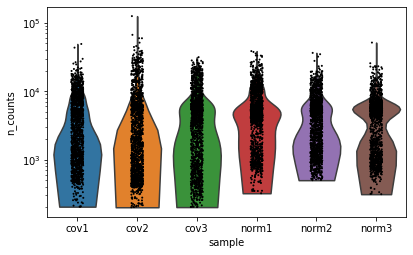

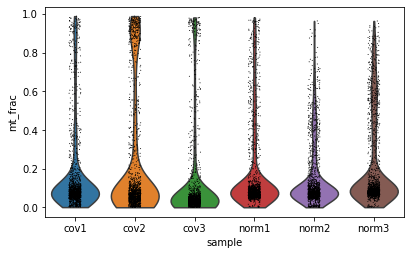

In [114]:
# Quality control - plot QC metrics
#Sample quality plots
t1 = sc.pl.violin(adata, 'n_counts', groupby='sample', size=2, log=True, cut=0)
t2 = sc.pl.violin(adata, 'mt_frac', groupby='sample')

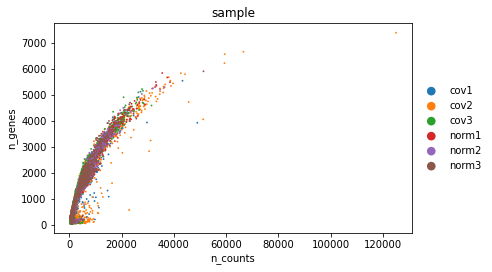

In [115]:
p1 = sc.pl.scatter(adata, 'n_counts', 'n_genes', color='sample')

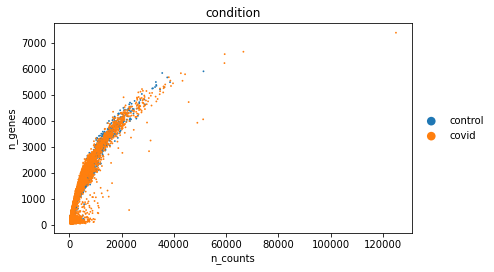

In [116]:
p1 = sc.pl.scatter(adata, 'n_counts', 'n_genes', color='condition')

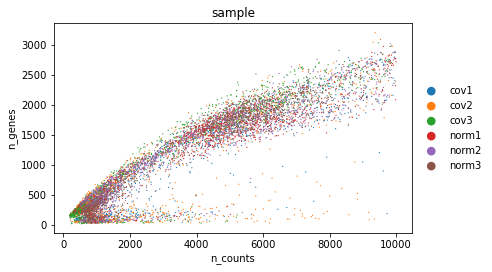

In [117]:
p2 = sc.pl.scatter(adata[adata.obs['n_counts']<10000], 'n_counts', 'n_genes', color='sample',
                  size=6)

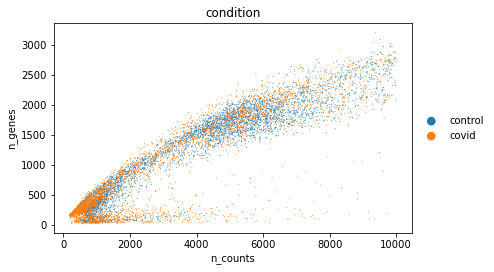

In [118]:
p2 = sc.pl.scatter(adata[adata.obs['n_counts']<10000], 'n_counts', 'n_genes', color='condition',
                  size=4)

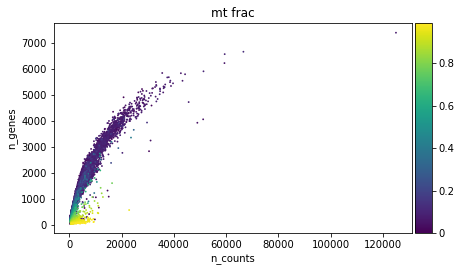

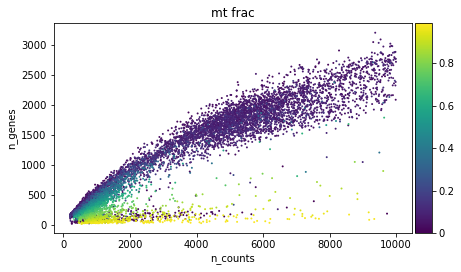

In [119]:
#Data quality summary plots
p1 = sc.pl.scatter(adata, 'n_counts', 'n_genes', color='mt_frac')
p2 = sc.pl.scatter(adata[adata.obs['n_counts']<10000], 'n_counts', 'n_genes', color='mt_frac')

C:\Users\Nastavnik\miniconda3\envs\sc_analysis\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


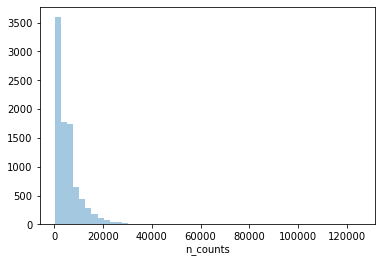

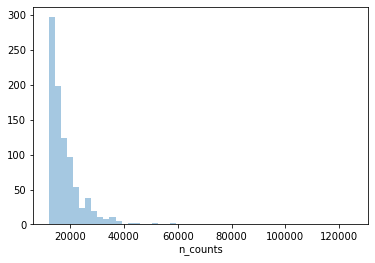

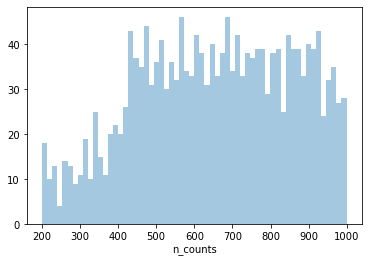

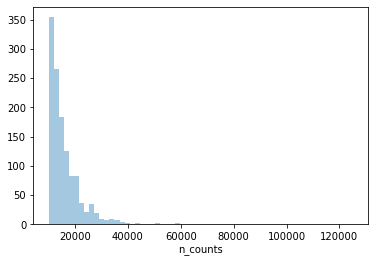

In [120]:
#Thresholding decision: counts
p3 = sb.distplot(adata.obs['n_counts'], kde=False)
plt.show()

p3_1 = sb.distplot(adata.obs['n_counts'][adata.obs['n_counts']>12000], kde=False)
plt.show()

p4 = sb.distplot(adata.obs['n_counts'][adata.obs['n_counts']<1000], kde=False, bins=60)
plt.show()

p5 = sb.distplot(adata.obs['n_counts'][adata.obs['n_counts']>10000], kde=False, bins=60)
plt.show()

In [121]:
# n_counts_upper = 32000
# n_counts_upper = 25000

# n_counts_lower = 450



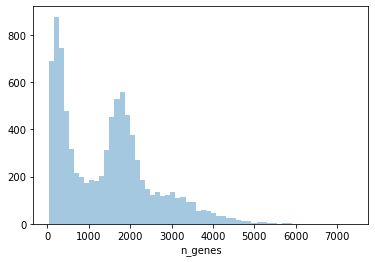

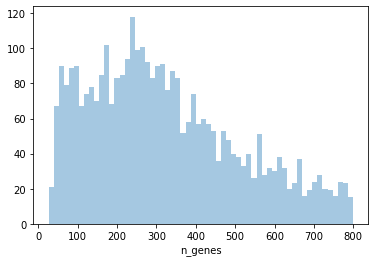

In [122]:
#Thresholding decision: genes
p6 = sb.distplot(adata.obs['n_genes'], kde=False, bins=60)
plt.show()

p7 = sb.distplot(adata.obs['n_genes'][adata.obs['n_genes']<800], kde=False, bins=60)
plt.show()


In [123]:
# n_genes_lower = 150
# n_genes_lower = 200

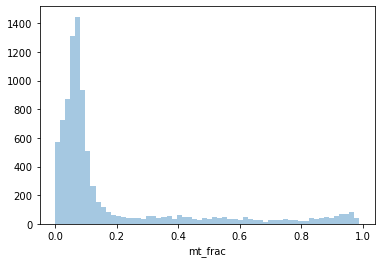

In [124]:
p8 = sb.distplot(adata.obs['mt_frac'], kde=False, bins=60)
plt.show()

In [125]:
# mt_frac_upper = 0.2

In [126]:
adata.obs['sample'].unique()

['cov1', 'cov2', 'cov3', 'norm1', 'norm2', 'norm3']
Categories (6, object): ['cov1', 'cov2', 'cov3', 'norm1', 'norm2', 'norm3']

In [127]:
adata_subset = adata[adata.obs['sample']=='cov1',:]

In [128]:
adata_subset

View of AnnData object with n_obs × n_vars = 1500 × 33538
    obs: 'sample', 'condition', 'batch', 'n_counts', 'log_counts', 'n_genes', 'mt_frac'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'sample_colors', 'condition_colors'

In [129]:
adata_subset.obs['n_counts']

AGGGTCCCATGACCCG-1-0     7698.0
TACCCACAGCGGGTTA-1-0    13416.0
CCCAACTTCATATGGC-1-0    16498.0
TCAAGTGTCCGAACGC-1-0     1425.0
ATTCCTAGTGACTGTT-1-0     7535.0
                         ...   
ACTCCCAAGATGCGAC-1-0     7616.0
AGTGCCGGTTGGTAGG-1-0      472.0
CCCATTGAGGCCCGTT-1-0      770.0
CAACGGCGTCGGCTAC-1-0     8308.0
ATCACTTGTAGGCAAC-1-0      454.0
Name: n_counts, Length: 1500, dtype: float32

In [130]:
adata.obs['n_counts']

AGGGTCCCATGACCCG-1-0     7698.0
TACCCACAGCGGGTTA-1-0    13416.0
CCCAACTTCATATGGC-1-0    16498.0
TCAAGTGTCCGAACGC-1-0     1425.0
ATTCCTAGTGACTGTT-1-0     7535.0
                         ...   
GTCACTCCACTCTCGT-5-5     6479.0
TGACCCTGTAGATTAG-5-5     5335.0
TCCTTTCGTAAGGCCA-5-5     4596.0
CTACCCACACGACCTG-5-5     6766.0
CTGAGCGTCAAACCTG-5-5     3393.0
Name: n_counts, Length: 9000, dtype: float32

In [131]:
adata_subset = adata[adata.obs['sample']=='cov1',:]

C:\Users\Nastavnik\miniconda3\envs\sc_analysis\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


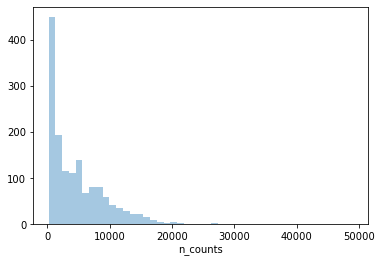

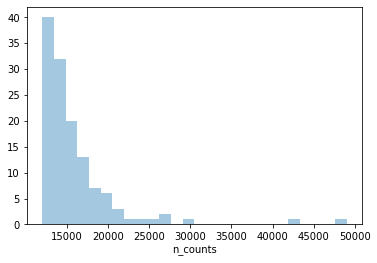

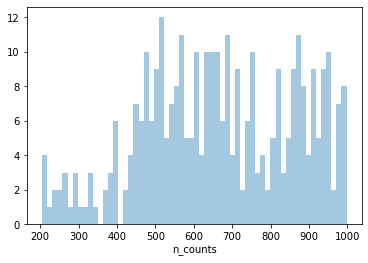

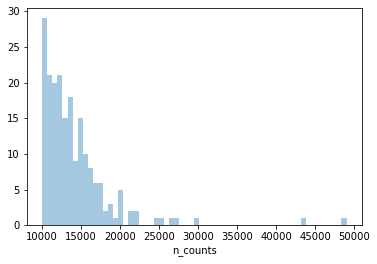

In [132]:
#Thresholding decision: counts
p3 = sb.distplot(adata_subset.obs['n_counts'], kde=False)
plt.show()

p3_1 = sb.distplot(adata_subset.obs['n_counts'][adata_subset.obs['n_counts']>12000], kde=False)
plt.show()

p4 = sb.distplot(adata_subset.obs['n_counts'][adata_subset.obs['n_counts']<1000], kde=False, bins=60)
plt.show()

p5 = sb.distplot(adata_subset.obs['n_counts'][adata_subset.obs['n_counts']>10000], kde=False, bins=60)
plt.show()

In [133]:
# cov1
# n_count_upper_1
# n_count_upper_2

# n_count_lower_1
# n_count_lower_2

# n_genes_lower

# mt_frac

## Filtering cells

### All samples - manual

In [134]:
# all samples together - manual thresholding
n_counts_upper_1 = 32000
n_counts_upper_2 = 25000

n_counts_lower = 450

n_genes_lower_1 = 150
n_genes_lower_2 = 200

mt_frac_lower = 0.2

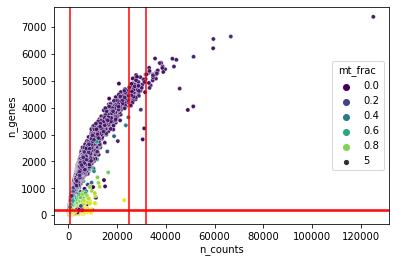

In [135]:
sb.scatterplot(data=adata.obs,
               x='n_counts',
               y='n_genes',
               hue='mt_frac',
               palette="viridis",
               size=5
              )
plt.axvline(x=n_counts_lower, c="red")
plt.axvline(x=n_counts_upper_1, c="red")
plt.axvline(x=n_counts_upper_2, c="red")

plt.axhline(y=n_genes_lower_1, c="red")
plt.axhline(y=n_genes_lower_2, c="red")

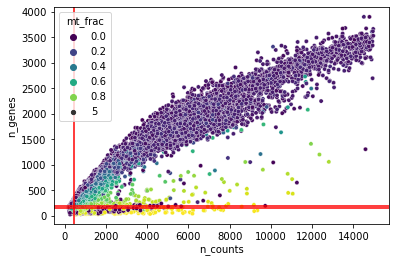

In [136]:
sb.scatterplot(data=adata.obs[adata.obs['n_counts']<15000],
               x='n_counts',
               y='n_genes',
               hue='mt_frac',
               palette="viridis",
               size=5
              )
plt.axvline(x=n_counts_lower, c="red")

plt.axhline(y=n_genes_lower_1, c="red")
plt.axhline(y=n_genes_lower_2, c="red")

In [154]:
# Filter cells according to identified QC thresholds:
print('Total number of cells: {:d}'.format(adata.n_obs))

adata_flt_all_man = adata[adata.obs['n_counts']>n_counts_lower,:]
print('Number of cells after min count filter: {:d}'.format(adata_flt_all_man.n_obs))

adata_flt_all_man = adata_flt_all_man[adata_flt_all_man.obs['n_counts']<n_counts_upper_1,:]
print('Number of cells after max count filter: {:d}'.format(adata_flt_all_man.n_obs))

adata_flt_all_man = adata_flt_all_man[adata_flt_all_man.obs['mt_frac'] < 0.2]
print('Number of cells after MT filter: {:d}'.format(adata_flt_all_man.n_obs))

adata_flt_all_man = adata_flt_all_man[adata_flt_all_man.obs['n_genes'] > n_genes_lower_1]
print('Number of cells after gene filter: {:d}'.format(adata_flt_all_man.n_obs))

Total number of cells: 9000
Number of cells after min count filter: 8673
Number of cells after max count filter: 8638
Number of cells after MT filter: 6732
Number of cells after gene filter: 6513


In [155]:
# np.logical_and((adata.obs['n_counts']<n_counts_upper_1),
#                (adata.obs['n_counts']>n_counts_lower), 
#               )

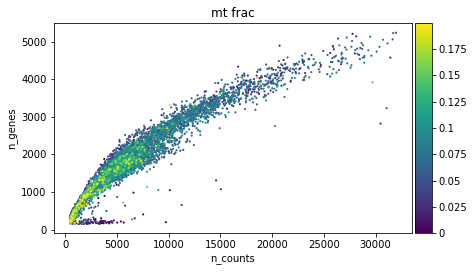

In [156]:
p1 = sc.pl.scatter(adata_flt_all_man, 'n_counts', 'n_genes', color='mt_frac')

### All samples Auto

In [157]:
def determine_threshold (adata, n = 3, mode = 'mad', min = True, max = True):
    if mode == 'mad':
        if min:
            min_threshold = np.median(adata.obs['log_counts']) - n * \
            np.median(np.absolute(adata.obs['log_counts'] - np.median(adata.obs['log_counts'])))
        if max:
            max_threshold = np.median(adata.obs['log_counts']) + n * \
            np.median(np.absolute(adata.obs['log_counts'] - np.median(adata.obs['log_counts'])))
        return min_threshold, max_threshold

In [158]:
determine_threshold(adata)

(5.9967756271362305, 10.73107624053955)

In [160]:
def qc_count (adata, min = True, max = True, mt = False, max_mt_frac = None, n = 3):
    if min:
        min_value = determine_threshold(adata, n = n)[0]
        print(min_value)
        print(np.exp(min_value))
        adata = adata[adata.obs['log_counts'] > min_value, :]
        print (adata.shape)
    if max:
        max_value = determine_threshold(adata, n = n)[1]
        print(max_value)
        print(np.exp(max_value))
        adata = adata[adata.obs['log_counts'] < max_value, :]
        print (adata.shape)
    if mt:
        adata = adata[adata.obs['mt_frac'] < max_mt_frac, :]
        print (adata.shape)
    return adata

In [163]:
adata_flt_all_auto = qc_count(adata, mt = True, max_mt_frac = 0.2)

5.9967756271362305
402.1300835262991
(8784, 33538)
10.657384395599365
42505.31456145271
(8773, 33538)
(6852, 33538)


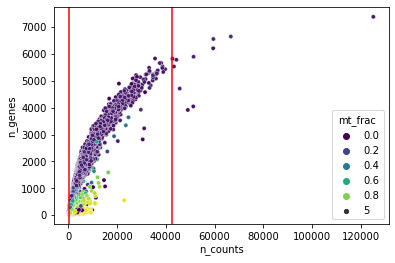

In [164]:
sb.scatterplot(data=adata.obs,
               x='n_counts',
               y='n_genes',
               hue='mt_frac',
               palette="viridis",
               size=5
              )
plt.axvline(x=402.13, c="red")
plt.axvline(x=42505.31, c="red")

In [165]:
adata_flt_all_auto

View of AnnData object with n_obs × n_vars = 6852 × 33538
    obs: 'sample', 'condition', 'batch', 'n_counts', 'log_counts', 'n_genes', 'mt_frac'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'sample_colors', 'condition_colors'

### Per samples - manual

In [166]:
adata.obs['n_genes'].unique()

array([2140, 3391, 3654, ..., 1707, 2805, 3532])

### Per samples - auto